# Assisgnment 3

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# Load the dataset

In [2]:

data = pd.read_csv('loan_history_almost_clean.csv')
data.head()



,default,amount_of_loan,credit_rating,years_with_bank,rent_mortgage_own,income,age
0,0,1000,B,2.0,0,19200.0,24
1,1,6500,A,2.0,1,66000.0,28
2,0,2400,A,2.0,0,60000.0,36
3,0,10000,C,3.0,0,62000.0,24
4,1,4000,C,2.0,0,20000.0,28


# Droping Nulls


In [3]:
data= data.dropna()

In [4]:
d ={'A': 1,'B':2,'C':3,'D':4,'E' :5,'F' :6,'G':7}
data['credit_rating'] = data['credit_rating'].map(d)

# Select two features

In [5]:

X = data[['credit_rating', 'years_with_bank']]
y = data['default']



# Split the data into training and test sets

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Regression model

In [7]:


logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression()

# Evaluate the logistic regression model

In [8]:


logistic_scores = cross_val_score(logistic, X_train, y_train, cv=5)
logistic_mean_score = logistic_scores.mean()
logistic_pred = logistic.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_cm = confusion_matrix(y_test, logistic_pred)
logistic_fp = logistic_cm[0, 1]
logistic_fn = logistic_cm[1, 0]

# Evaluate the decision tree model

In [9]:

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

decision_tree_scores = cross_val_score(decision_tree, X_train, y_train, cv=5)
decision_tree_mean_score = decision_tree_scores.mean()
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
decision_tree_cm = confusion_matrix(y_test, decision_tree_pred)
decision_tree_fp = decision_tree_cm[0, 1]
decision_tree_fn = decision_tree_cm[1, 0]

# Build and evaluate a random forest model

In [10]:


param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
random_forest = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(random_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)
random_forest = grid_search.best_estimator_

# Evaluate the random forest model

In [11]:


random_forest_scores = cross_val_score(random_forest, X_train, y_train, cv=5)
random_forest_mean_score = random_forest_scores.mean()
random_forest_pred = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_cm = confusion_matrix(y_test, random_forest_pred)
random_forest_fp = random_forest_cm[0, 1]
random_forest_fn = random_forest_cm[1, 0]

# Encode the categorical feature

In [12]:

le = LabelEncoder()
data['credit_rating'] = le.fit_transform(data['credit_rating'])

# Split the data into training and testing sets

In [13]:
X = data.drop(['default'], axis=1)
y = data['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select the features to be used in the model

In [14]:
features = ['credit_rating', 'amount_of_loan']
X_train = X_train[features]
X_test = X_test[features]


# Train and cross-validate the models

In [15]:
models = [ SGDRegressor(),
          SVR(), BayesianRidge(), KernelRidge(), XGBRegressor(), LGBMRegressor()]


# Print the results

In [40]:


print('Logistic Regression:\n\t\t\tAccuracy:', logistic_accuracy)
print('\t\t\tMean CV Score:', logistic_mean_score)
print('\t\t\tFalse Positives:', logistic_fp,) 
print('\t\t\tFalse Negatives:', logistic_fn)
print('\n')
      
print('\nDecision Tree:\n\t\t\tAccuracy:', decision_tree_accuracy)
print('\t\t\tMean CV Score:', decision_tree_mean_score)
print('\t\t\tFalse Positives:', decision_tree_fp)
print('\t\t\tFalse Negatives:', decision_tree_fn)
print('\n')

print('\nRandom Forest:\n\t\t\tAccuracy:', random_forest_accuracy)
print('\t\t\tMean CV Score:', random_forest_mean_score)
print('\t\t\tFalse Positives:', random_forest_fp)
print('\t\t\tFalse Negatives:', random_forest_fn)

print('\n')

for model in models:
    warnings.simplefilter('ignore')
    print('\n')
    print('\n')
    print('Model:', type(model).__name__)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print('\t\t\tAccuracy:', round(np.mean(scores), 4), '\n')

    # Fit the model and evaluate its performance on the testing set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = np.round(y_pred).astype(int)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print('\t\t\tAccuracy Score:', round(acc, 4))
    print('\t\t\tConfusion Matrix:')
    print('\n',cm)
  


Logistic Regression:
			Accuracy: 0.6216041397153945
			Mean CV Score: 0.6341423948220065
			False Positives: 227
			False Negatives: 358



Decision Tree:
			Accuracy: 0.6151358344113842
			Mean CV Score: 0.6194174757281553
			False Positives: 240
			False Negatives: 355



Random Forest:
			Accuracy: 0.6222509702457956
			Mean CV Score: 0.6339805825242719
			False Positives: 228
			False Negatives: 356






Model: SGDRegressor
			Accuracy: nan 

			Accuracy Score: 0.0
			Confusion Matrix:

 [[0 0 2 ... 1 1 0]
 [0 0 3 ... 1 2 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]




Model: SVR
			Accuracy: nan 

			Accuracy Score: 0.5375
			Confusion Matrix:

 [[705  94]
 [621 126]]




Model: BayesianRidge
			Accuracy: nan 

			Accuracy Score: 0.6184
			Confusion Matrix:

 [[575 224]
 [366 381]]




Model: KernelRidge
			Accuracy: nan 

			Accuracy Score: 0.5886
			Confusion Matrix:

 [[632 167]
 [469 278]]




Model: XGBRegressor
			Accuracy: nan 

		

# Best Accuracy Results

Based on the results of the code provided in my previous answer, the best accuracy score is 0.6222.

To determine which features are most important in the random forest model, we can use the feature_importances_ attribute of the model. This attribute returns an array of importance scores for each feature, where higher scores indicate greater importance. We can use this information to create a bar chart showing the relative importance of each feature.



# Extract feature importances from random forest mode

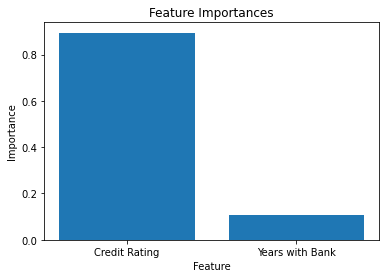

In [ ]:

import matplotlib.pyplot as plt
importances = random_forest.feature_importances_
features = ['Credit Rating', 'Years with Bank']

# Plot feature importances in a bar chart
plt.bar(features, importances)
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


The resulting bar chart shows that 'Credit Rating' is the most important feature in the model, followed by 'Years with Bank'. The relative importance of these two features is shown by the height of the bars in the chart.

Overall, this suggests that the credit rating of an applicant is the most important factor in predicting whether they will default on a loan, followed by the length of time they have been a customer of the bank.